This (article] [http://pbpython.com/simple-graphing-pandas.html] will walk through how to start doing some simple graphing in pandas.
I am using a new data file that is the same format as my previous article but includes data for only 20 customers.
First we are going to import pandas, numpy and matplot lib. 
I am also showing the versions I'm testing so you can make sure yours is compatible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'0.18.1'

Next, enable iPython to display matplotlib graphs. As an alternative you can run ipython notebook.

In [2]:
%matplotlib inline

We will read in the file like we did in the previous article but I'm going to tell it to treat the date column as a date field so I can do some re-sampling later.

In [3]:
sales=pd.read_csv("sample-salesv2.csv",parse_dates=['date'])
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,199372,Cruickshank and Sons,FQ-39509,Belt,12,65.26,783.12,2014-12-06 15:02:14
1,518580,Hessel-Lind,XV-77832,Shirt,14,28.26,395.64,2014-10-29 14:54:18
2,368293,Hodkiewicz-Kozey,BC-56182,Belt,4,54.93,219.72,2015-03-11 21:45:30
3,677566,Boyle-Wiegand,BH-22979,Belt,4,65.37,261.48,2014-05-21 16:07:44
4,677566,Boyle-Wiegand,FQ-39509,Belt,19,35.34,671.46,2015-04-15 12:50:05


Now that we have read in the data, we can do some quick analysis

In [4]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,496998.477000,10.450000,55.465770,580.21763
std,271588.313857,5.777272,25.621962,445.17188
min,62767.000000,1.000000,10.350000,12.85000
25%,200626.000000,5.000000,33.900000,213.72000
50%,518580.000000,11.000000,56.400000,462.37500
75%,687215.000000,15.000000,77.610000,872.76750
max,968503.000000,20.000000,99.580000,1906.60000


We can actually learn some pretty helpful info from this simple command:
For example, we can tell that customers on average purchases 10.3 items per transaction and that the average cost of the transaction was $579.84. It is also easy to see the min and max so you understand the range of the data.

In [5]:
sales['unit price'].describe()

count    1000.000000
mean       55.465770
std        25.621962
min        10.350000
25%        33.900000
50%        56.400000
75%        77.610000
max        99.580000
Name: unit price, dtype: float64

It is easy to call describe on a single column too. I can see that my average price is \$56.18 but it ranges from \$10.06 to \$99.97.

I am showing the output of dtypes so that you can see that the date column is a datetime field. I also scan this to make sure that any columns that have numbers are floats or ints so that I can do additional analysis in the future.

In [6]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

Now we remove some columns to make additional analysis easier.

In [7]:
customers = sales[['name','ext price','date']]
customers.head()

,name,ext price,date
0,Cruickshank and Sons,783.12,2014-12-06 15:02:14
1,Hessel-Lind,395.64,2014-10-29 14:54:18
2,Hodkiewicz-Kozey,219.72,2015-03-11 21:45:30
3,Boyle-Wiegand,261.48,2014-05-21 16:07:44
4,Boyle-Wiegand,671.46,2015-04-15 12:50:05


This representation has multiple lines for each customer. In order to understand purchasing patterns, let's group all the customers by name.

In [8]:
customer_group = customers.groupby('name')
customer_group.size()

name
Boyer-Kerluke                         50
Boyle-Wiegand                         53
Braun-Wehner                          65
Crona-Leannon                         51
Cruickshank and Sons                  46
Feest LLC                             54
Heller Inc                            38
Hessel-Lind                           57
Hills Ltd                             52
Hodkiewicz-Kozey                      36
Johnston-Deckow                       54
Kautzer, Kunze and Eichmann           48
Keebler PLC                           51
Kiehn, Metz and Turcotte              49
Leuschke Inc                          55
Little and Sons                       57
Mitchell PLC                          41
Moore, Stehr and Carroll              56
Nolan, Koepp and McDermott            49
Schulist, Christiansen and Douglas    38
dtype: int64

Now that our data is in a simple format to manipulate, let's determine how much each customer purchased during our time frame.

The sum function allows us to quickly sum up all the values by customer. We can also sort the data using the sort command.

In [9]:
sales_totals = customer_group.sum()
sales_totals.sort_values(by=['ext price']).head()

,ext price
name,
Mitchell PLC,18855.52
Hodkiewicz-Kozey,19900.27
"Schulist, Christiansen and Douglas",22122.12
Cruickshank and Sons,22716.09
Heller Inc,23224.74


Now that we know what the data look like, tt is very simple to create a quick bar chart plot.

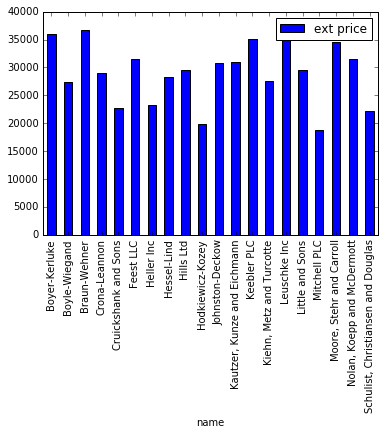

In [10]:
my_plot = sales_totals.plot(kind='bar')

Unfortunately this chart is a little ugly. With a few tweaks we can make it a little more impactful.
Let's try:
- sorting the data in descending order.
- Removing the legend
- Adding a title
- Labeling the axes

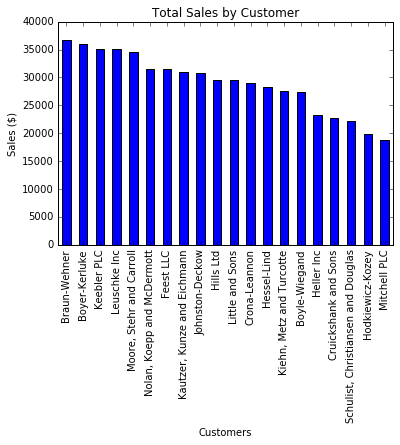

In [11]:
my_plot = sales_totals.sort_values(by=['ext price'],ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

This actually tells us a little about our biggest customers and how much difference there is between their sales and our smallest customers.

Now, let's try to see how the sales break down by category.

In [12]:
customers = sales[['name','category','ext price','date']]
customers.head()

,name,category,ext price,date
0,Cruickshank and Sons,Belt,783.12,2014-12-06 15:02:14
1,Hessel-Lind,Shirt,395.64,2014-10-29 14:54:18
2,Hodkiewicz-Kozey,Belt,219.72,2015-03-11 21:45:30
3,Boyle-Wiegand,Belt,261.48,2014-05-21 16:07:44
4,Boyle-Wiegand,Belt,671.46,2015-04-15 12:50:05


We can use groupby to organize the data by category and name.

In [13]:
category_group=customers.groupby(['name','category']).sum()
category_group.head()

ext price
name          category           
Boyer-Kerluke Belt       13201.21
              Shirt      19043.45
              Shoes       3748.47
Boyle-Wiegand Belt       10959.84
              Shirt      12274.01

The category representation looks good but we need to break it apart to graph it as a stacked bar graph. Unstack can do this for us.

In [14]:
category_group.unstack().head()

ext price                   
category                  Belt     Shirt    Shoes
name                                             
Boyer-Kerluke         13201.21  19043.45  3748.47
Boyle-Wiegand         10959.84  12274.01  4199.82
Braun-Wehner          13841.64  15916.63  6861.65
Crona-Leannon         12754.64   9863.25  6332.65
Cruickshank and Sons  10770.14   5914.07  6031.88

Now plot it.

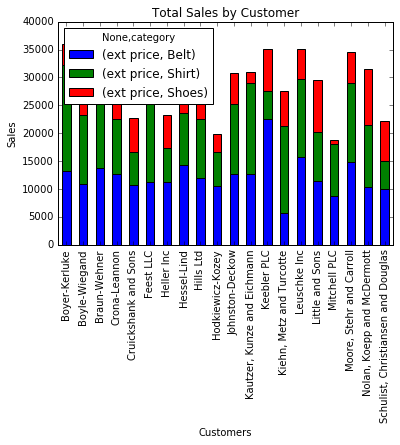

In [15]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")

Now clean some of this up a little bit.
We can specify the figure size and customize the legend.

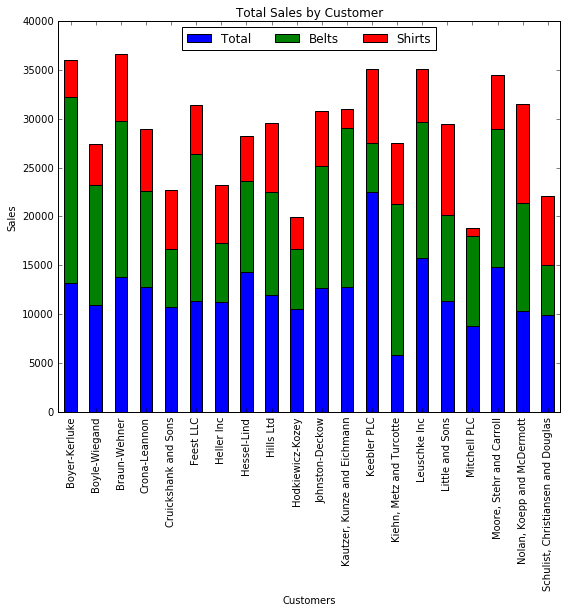

In [16]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)

Now that we know who the biggest customers are and how they purchase products, we might want to look at purchase patterns in more detail.

Let's take another look at the data and try to see how large the individual purchases are. A histogram allows us to group purchases together so we can see how big the customer transactions are.

In [17]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,783.12,2014-12-06 15:02:14
1,395.64,2014-10-29 14:54:18
2,219.72,2015-03-11 21:45:30
3,261.48,2014-05-21 16:07:44
4,671.46,2015-04-15 12:50:05


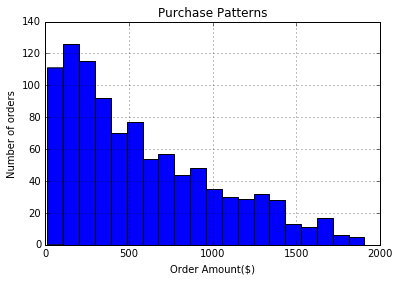

In [18]:
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

After looking at this group

We can look at purchase patterns over time. We can see that most of our transactions are less than $500 and only a very few are about $1500.

Another interesting way to look at the data would be by sales over time. Do we have certain months where we are busier than others?

Let's get the data down to order size and date.

In [19]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,783.12,2014-12-06 15:02:14
1,395.64,2014-10-29 14:54:18
2,219.72,2015-03-11 21:45:30
3,261.48,2014-05-21 16:07:44
4,671.46,2015-04-15 12:50:05


If we want to analyze the data by date, we need to set the date column as the index.

In [20]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

,ext price
date,
2014-12-06 15:02:14,783.12
2014-10-29 14:54:18,395.64
2015-03-11 21:45:30,219.72
2014-05-21 16:07:44,261.48
2015-04-15 12:50:05,671.46


One of the really cool things that pandas allows us to do is resample the data. If we want to look at the data by month, we can easily resample and sum it all up.

purchase_patterns.resample('M',how=sum)

Plotting the data is now very easy

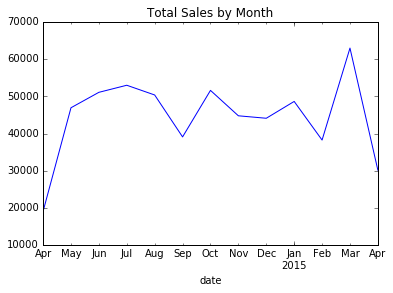

In [21]:
purchase_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month",legend=None)

December is our peak month and April is the slowest.

Let's say we really like this plot and want to save it somewhere for a presentation.

In [22]:
fig = purchase_plot.get_figure()
fig.savefig("total-sales.png")